**The task of FEB22 TPS competition is to classify 10 different bacteria species using data from a genomic analysis technique that has some data compression and data loss.**

# Importing Libraries

In [1]:
# Intel® Extension for Scikit-learn installation: (speeds up Kernel)
#!pip install scikit-learn-intelex

import os
import warnings

import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

from tqdm import tqdm
from pathlib import Path

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#from sklearnex import patch_sklearn
#patch_sklearn()


# Mute warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
train = pd.read_csv('../input/tabular-playground-series-feb-2022/train.csv')
test = pd.read_csv('../input/tabular-playground-series-feb-2022/test.csv')

In [3]:
display( train.head() )

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


In [4]:
display( test.head() )

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,200000,-9.536743e-07,-0.000002,-9.153442e-07,0.000024,0.000034,-0.000002,0.000021,0.000024,-0.000009,...,0.000039,0.000085,0.000055,0.000108,0.000090,0.000059,0.000010,0.000006,0.000027,4.632568e-08
1,200001,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,0.001800,-0.000240,0.001800,-0.000114,0.000957,...,-0.000043,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
2,200002,4.632568e-08,0.000003,8.465576e-08,-0.000014,0.000007,-0.000005,-0.000004,0.000003,0.000004,...,0.000041,0.000102,0.000084,0.000111,0.000117,0.000070,0.000020,0.000030,0.000021,4.632568e-08
3,200003,-9.536743e-07,-0.000008,8.084656e-06,0.000216,0.000420,0.000514,0.000452,0.000187,-0.000005,...,0.000069,0.000158,0.000098,0.000175,0.000217,0.000150,0.000018,0.000016,0.000051,-9.536743e-07
4,200004,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,-0.000086,-0.000043,-0.000086,0.000914,-0.000043,-0.000010,-0.000010,0.000990,-9.536743e-07


# EDA

In [5]:
display(train.shape)

display(test.shape)

(200000, 288)

(100000, 287)

In [6]:
train.drop('row_id' , axis=1 , inplace=True)
test.drop('row_id' , axis=1 , inplace=True)

In [7]:
display(len(train.select_dtypes(include=np.number).columns.tolist()) )
display(len(test.select_dtypes(include=np.number).columns.tolist()) )

286

286

All Features are integers

In [8]:
display(train.isnull().values.any())
display(test.isnull().values.any())

False

False

No sign of missing data in both train and test dataset

**Target values and their count**

In [9]:
train.target.value_counts()

Bacteroides_fragilis        20139
Streptococcus_pyogenes      20076
Streptococcus_pneumoniae    20074
Campylobacter_jejuni        20063
Salmonella_enterica         20030
Escherichia_coli            19958
Enterococcus_hirae          19947
Escherichia_fergusonii      19937
Staphylococcus_aureus       19929
Klebsiella_pneumoniae       19847
Name: target, dtype: int64

**Observations**
* Ten classes of bacterias
* Classes are balanced

**Dropping Duplicates if present**

In [10]:
display(train.duplicated().sum())

76007

In [11]:
train.drop_duplicates(keep='first' , inplace=True)
train.shape

(123993, 287)

**Basic Description (Statistics) of Training Data**

In [12]:
train.describe()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
count,1.239930e+05,1.239930e+05,123993.000000,123993.000000,123993.000000,123993.000000,123993.000000,123993.000000,123993.000000,123993.000000,...,123993.000000,123993.000000,123993.000000,123993.000000,123993.000000,123993.000000,123993.000000,1.239930e+05,123993.000000,1.239930e+05
mean,2.848069e-07,-2.510355e-06,-0.000011,0.000006,0.000028,0.000053,0.000027,0.000005,-0.000024,-0.000007,...,0.000131,0.000347,0.000249,0.000437,0.000555,0.000364,0.000057,8.798707e-05,0.000102,3.750136e-07
std,6.534260e-05,6.616071e-05,0.000185,0.000325,0.000515,0.000674,0.000585,0.000313,0.000087,0.000071,...,0.000485,0.000800,0.000649,0.000893,0.001114,0.000874,0.000311,4.002582e-04,0.000476,1.474596e-05
min,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-9.536743e-06,-0.000010,-9.536743e-07
25%,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,0.000006,0.000024,0.000024,0.000054,0.000044,0.000006,-0.000010,4.632568e-07,-0.000010,-9.536743e-07
50%,-9.536743e-07,-6.536743e-06,-0.000023,-0.000054,-0.000110,-0.000102,-0.000120,-0.000054,-0.000041,-0.000010,...,0.000057,0.000144,0.000097,0.000193,0.000205,0.000127,0.000013,1.846326e-05,0.000034,-9.536743e-07
75%,-9.536743e-07,4.632568e-07,0.000001,0.000026,0.000035,0.000040,0.000020,0.000036,-0.000013,-0.000008,...,0.000157,0.000498,0.000354,0.000594,0.000775,0.000427,0.000060,9.946326e-05,0.000096,4.632568e-08
max,9.999046e-03,9.990463e-03,0.009957,0.009886,0.019800,0.019760,0.019800,0.009886,0.009957,0.009990,...,0.019957,0.019914,0.019957,0.019914,0.019914,0.019957,0.009990,9.990463e-03,0.019990,9.990463e-04


In [13]:
train.describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='rocket') 
                     #.bar(subset=["max"], color='#F8766D')\
                     #.bar(subset=["mean",], color='#00BFC4')

,count,mean,std,min,25%,50%,75%,max
A3T1G3C3,123993.000000,-0.002153,0.008331,-0.016022,-0.007178,-0.002022,0.000698,0.073978
A4T3G2C1,123993.000000,0.004006,0.008207,-0.012016,-0.001276,0.002004,0.006954,0.097984
A2T2G3C3,123993.000000,-0.006533,0.007631,-0.024033,-0.013033,-0.004903,-0.000155,0.055967
A4T4G1C1,123993.000000,0.005132,0.007606,-0.006008,-0.000348,0.002992,0.007932,0.073992
A2T2G4C2,123993.000000,-0.003692,0.007579,-0.018024,-0.008584,-0.002444,-0.000184,0.061976
A2T2G2C4,123993.000000,-0.003826,0.006677,-0.018024,-0.008264,-0.002493,-0.000109,0.061976
A3T4G2C1,123993.000000,0.002587,0.006252,-0.012016,-0.001538,0.001382,0.006008,0.087984
A1T2G4C3,123993.000000,-0.002763,0.006072,-0.012016,-0.007856,-0.002265,0.001500,0.057984
A2T1G3C4,123993.000000,-0.003227,0.006016,-0.012016,-0.008248,-0.003376,0.001124,0.067984
A3T4G1C2,123993.000000,0.001140,0.005992,-0.012016,-0.002016,0.000734,0.005253,0.077984


In [14]:
features = [col for col in train.columns if col not in ['target']]
len(features)

286

# Feature Analysis / Visualizations

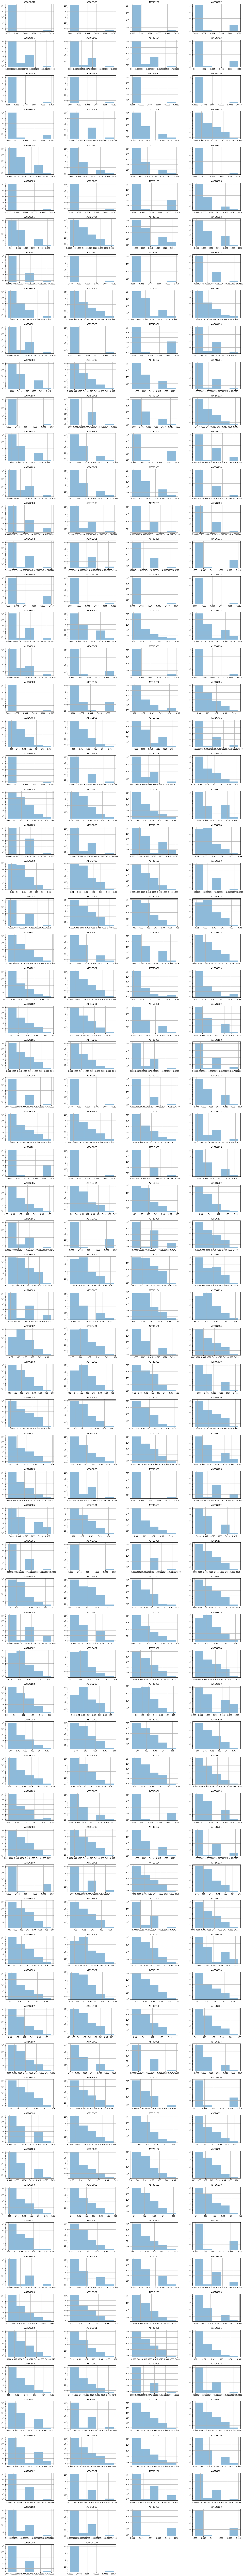

In [15]:
train[features].hist(bins=5 , alpha=0.5 , layout=(72,4) , log=True , figsize=(25,280))
plt.show()

**Analysis of Target**

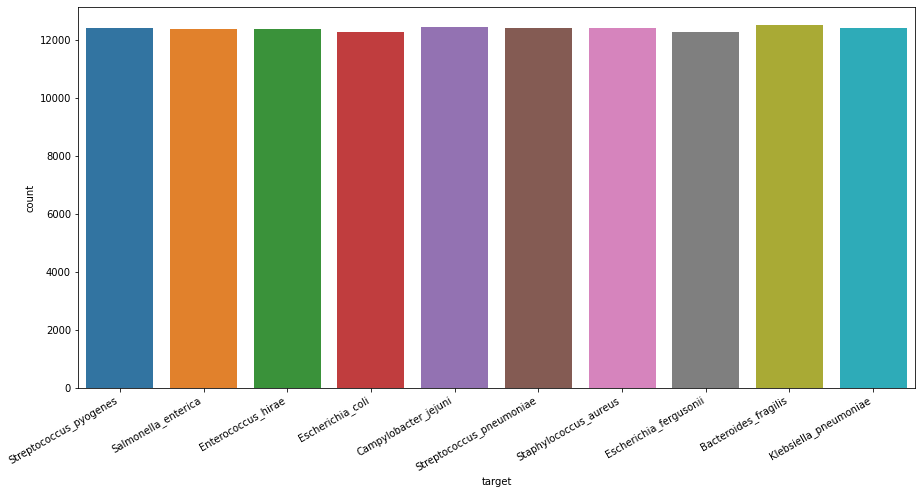

In [16]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x=train['target'] , data=train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

# Feature Engineering and Preprocessing

In [17]:
# train["mean"] = train[features].mean(axis=1)
# train["std"] = train[features].std(axis=1)
# train["min"] = train[features].min(axis=1)
# train["max"] = train[features].max(axis=1)

# test["mean"] = test[features].mean(axis=1)
# test["std"] = test[features].std(axis=1)
# test["min"] = test[features].min(axis=1)
# test["max"] = test[features].max(axis=1)

In [18]:
le = LabelEncoder()
train['target'] = le.fit_transform(train.target)
train.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,9
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,6
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,6
3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,6
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,2


**HELPER FUNCTION - REDUCE MEMORY USAGE** help taken from -> https://www.kaggle.com/remekkinas/super-learner-ensemble-extree-tuned-lda-umap/notebook#WORK-IN-PROGRESS-....

In [19]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [20]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

Memory usage of dataframe is 276.48 MB
Memory usage after optimization is: 72.73 MB
Decreased by 73.7%
Memory usage of dataframe is 218.20 MB
Memory usage after optimization is: 54.55 MB
Decreased by 75.0%


**Train/Test Split**

In [21]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(train.drop('target' , axis=1) , train.target , test_size=0.3 , random_state=42)

# Modelling

In [22]:
import lightgbm as lgb

dic_models = {'LightGBM' : lgb.LGBMClassifier() , 
              'RandomForest' : RandomForestClassifier() ,
              'ExtraTrees' : ExtraTreesClassifier()}

    
for i in dic_models:
    print('Training with ' + i + ' model. \n')
    
    model = dic_models[i].fit(X_train , y_train)
    
    #Predicting
    print('Predicting with ' + i + ' model. \n')
    pred = model.predict(X_test)
    
    # Using SMAPE for predicting models
    print("Accuracy of " + i + " Model is ", accuracy_score(y_test,pred))
    print("------------------------------------------------------------------")
    print()    

Training with LightGBM model. 

Predicting with LightGBM model. 

Accuracy of LightGBM Model is  0.9662885101349535
------------------------------------------------------------------

Training with RandomForest model. 

Predicting with RandomForest model. 

Accuracy of RandomForest Model is  0.9663422764664767
------------------------------------------------------------------

Training with ExtraTrees model. 

Predicting with ExtraTrees model. 

Accuracy of ExtraTrees Model is  0.9704285176622399
------------------------------------------------------------------



**Feature Importance (LGBM)**

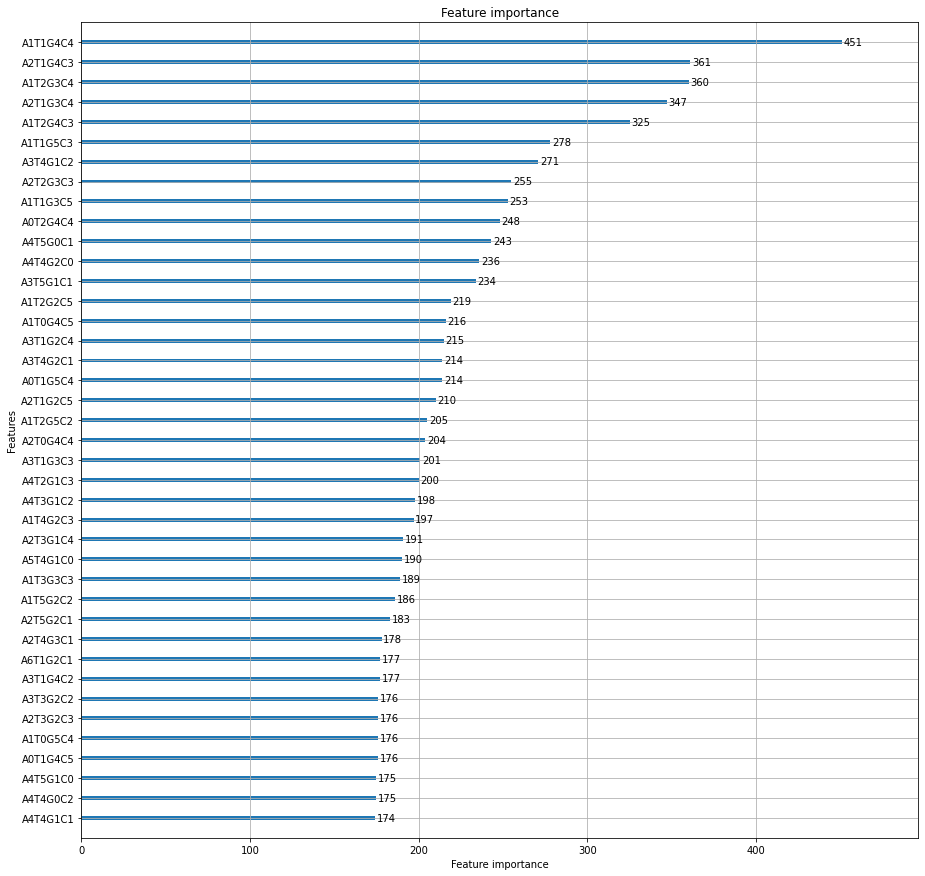

In [23]:
lgb.plot_importance(dic_models['LightGBM'], max_num_features=40, figsize=(15, 15))
plt.show()

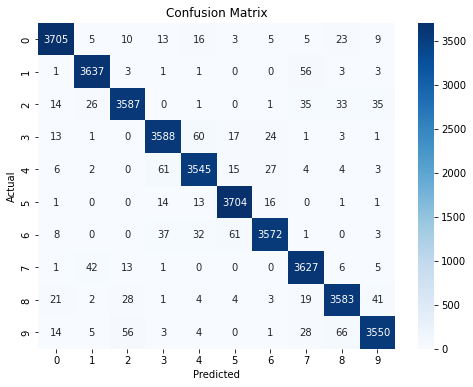

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test) 
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Training on Complete Data**

In [25]:
X = train.drop('target',axis=1)
y = train['target']

model = ExtraTreesClassifier()

model.fit(X,y)

ExtraTreesClassifier()

****

# Submission

**Predicting on Test Data**

In [26]:
final_preds = model.predict(test)

In [27]:
sub = pd.read_csv('../input/tabular-playground-series-feb-2022/sample_submission.csv')

In [28]:
final_preds = le.inverse_transform(final_preds)

In [29]:
sub['target'] = final_preds
sub.head()


,row_id,target
0,200000,Escherichia_fergusonii
1,200001,Salmonella_enterica
2,200002,Enterococcus_hirae
3,200003,Salmonella_enterica
4,200004,Staphylococcus_aureus


**Submitting**

In [30]:
sub.to_csv('submission.csv', index=False)